In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

latent_dim = 100
num_classes = 10
img_shape = (1,28,28)
batch_size = 64
epochs = 1000
lr = 0.0002

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

dataset = MNIST(
    root = "/kaggle/working",
    train = True,
    transform = transform,
    download=True
)   

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.0MB/s]


In [4]:
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [5]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], dim=1)
        img = self.model(x)
        return img.view(img.size(0), *img_shape)


In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.model = nn.Sequential(
            nn.Linear(28 * 28 + num_classes, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        img = img.view(img.size(0), -1)
        c = self.label_emb(labels)
        x = torch.cat([img, c], dim=1)
        return self.model(x)


In [7]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))


In [9]:
import os

In [10]:
fixed_z = torch.randn(10, latent_dim, device=device)
fixed_labels = torch.arange(0, 10, device=device)


os.makedirs("cgan_outputs", exist_ok=True)

def save_generated_images(epoch):
    generator.eval()
    with torch.no_grad():
        gen_imgs = generator(fixed_z, fixed_labels).detach().cpu()

    grid = torchvision.utils.make_grid(
        gen_imgs,
        nrow=10,
        normalize=True
    )

    plt.figure(figsize=(12, 2))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Epoch {epoch}")
    plt.show()

    save_image(
        gen_imgs,
        f"cgan_outputs/epoch_{epoch}.png",
        nrow=10,
        normalize=True
    )

    generator.train()


In [12]:
import torchvision

Epoch [1/1000] Batch [0/938] D Loss: 0.6027 G Loss: 1.8041
Epoch [1/1000] Batch [400/938] D Loss: 0.6161 G Loss: 1.9631
Epoch [1/1000] Batch [800/938] D Loss: 0.4540 G Loss: 2.2543


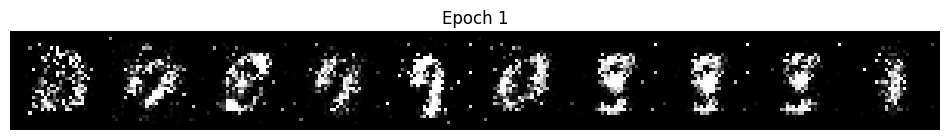

Epoch [2/1000] Batch [0/938] D Loss: 0.8071 G Loss: 4.4425
Epoch [2/1000] Batch [400/938] D Loss: 0.7387 G Loss: 3.9637
Epoch [2/1000] Batch [800/938] D Loss: 0.8395 G Loss: 1.1567
Epoch [3/1000] Batch [0/938] D Loss: 0.5273 G Loss: 1.5327
Epoch [3/1000] Batch [400/938] D Loss: 1.0522 G Loss: 1.3547
Epoch [3/1000] Batch [800/938] D Loss: 0.7548 G Loss: 1.6107
Epoch [4/1000] Batch [0/938] D Loss: 0.9225 G Loss: 1.1227
Epoch [4/1000] Batch [400/938] D Loss: 0.9275 G Loss: 2.0488
Epoch [4/1000] Batch [800/938] D Loss: 0.6574 G Loss: 1.7166
Epoch [5/1000] Batch [0/938] D Loss: 0.8063 G Loss: 1.1370
Epoch [5/1000] Batch [400/938] D Loss: 1.1584 G Loss: 2.9135
Epoch [5/1000] Batch [800/938] D Loss: 1.5197 G Loss: 2.9366
Epoch [6/1000] Batch [0/938] D Loss: 0.8455 G Loss: 1.8180
Epoch [6/1000] Batch [400/938] D Loss: 1.0377 G Loss: 0.9972
Epoch [6/1000] Batch [800/938] D Loss: 0.9427 G Loss: 1.4002
Epoch [7/1000] Batch [0/938] D Loss: 0.8628 G Loss: 1.5363
Epoch [7/1000] Batch [400/938] D Los

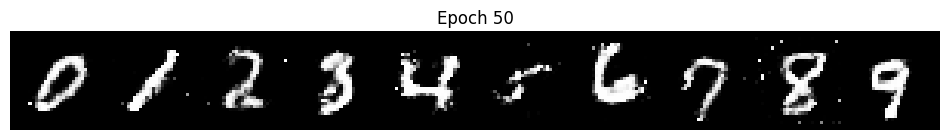

Epoch [51/1000] Batch [0/938] D Loss: 1.0630 G Loss: 0.8124
Epoch [51/1000] Batch [400/938] D Loss: 1.0017 G Loss: 1.0947
Epoch [51/1000] Batch [800/938] D Loss: 1.4944 G Loss: 0.4795
Epoch [52/1000] Batch [0/938] D Loss: 1.0189 G Loss: 1.2939
Epoch [52/1000] Batch [400/938] D Loss: 1.0877 G Loss: 1.2652
Epoch [52/1000] Batch [800/938] D Loss: 1.0607 G Loss: 0.9078
Epoch [53/1000] Batch [0/938] D Loss: 1.2340 G Loss: 2.1047
Epoch [53/1000] Batch [400/938] D Loss: 0.9811 G Loss: 1.3095
Epoch [53/1000] Batch [800/938] D Loss: 1.1295 G Loss: 0.8762
Epoch [54/1000] Batch [0/938] D Loss: 1.0046 G Loss: 1.3880
Epoch [54/1000] Batch [400/938] D Loss: 1.3197 G Loss: 1.8635
Epoch [54/1000] Batch [800/938] D Loss: 1.0976 G Loss: 0.9943
Epoch [55/1000] Batch [0/938] D Loss: 1.1418 G Loss: 0.7676
Epoch [55/1000] Batch [400/938] D Loss: 1.0781 G Loss: 0.9752
Epoch [55/1000] Batch [800/938] D Loss: 0.9815 G Loss: 0.8309
Epoch [56/1000] Batch [0/938] D Loss: 0.9128 G Loss: 1.1215
Epoch [56/1000] Batc

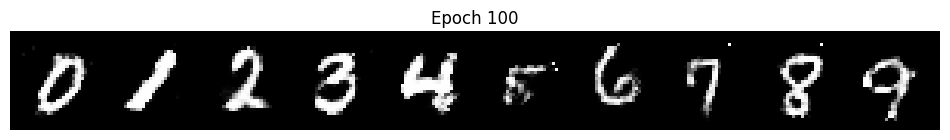

Epoch [101/1000] Batch [0/938] D Loss: 1.2341 G Loss: 2.2733
Epoch [101/1000] Batch [400/938] D Loss: 0.9756 G Loss: 1.3778
Epoch [101/1000] Batch [800/938] D Loss: 0.9389 G Loss: 1.3884
Epoch [102/1000] Batch [0/938] D Loss: 1.0735 G Loss: 1.6335
Epoch [102/1000] Batch [400/938] D Loss: 1.2019 G Loss: 0.8599
Epoch [102/1000] Batch [800/938] D Loss: 1.1499 G Loss: 1.3430
Epoch [103/1000] Batch [0/938] D Loss: 1.1254 G Loss: 1.5497
Epoch [103/1000] Batch [400/938] D Loss: 1.3694 G Loss: 2.2022
Epoch [103/1000] Batch [800/938] D Loss: 1.0578 G Loss: 1.2687
Epoch [104/1000] Batch [0/938] D Loss: 0.9788 G Loss: 1.0166
Epoch [104/1000] Batch [400/938] D Loss: 1.0307 G Loss: 1.5422
Epoch [104/1000] Batch [800/938] D Loss: 1.2579 G Loss: 1.8001
Epoch [105/1000] Batch [0/938] D Loss: 1.0496 G Loss: 1.9689
Epoch [105/1000] Batch [400/938] D Loss: 0.9867 G Loss: 1.5344
Epoch [105/1000] Batch [800/938] D Loss: 0.8855 G Loss: 1.1418
Epoch [106/1000] Batch [0/938] D Loss: 1.0635 G Loss: 1.1290
Epoc

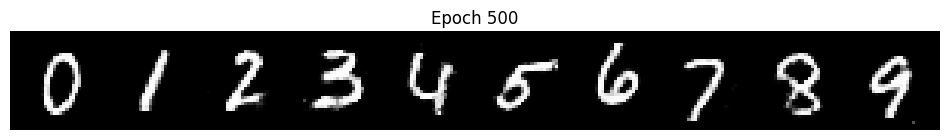

Epoch [501/1000] Batch [0/938] D Loss: 0.9691 G Loss: 1.6066
Epoch [501/1000] Batch [400/938] D Loss: 0.9586 G Loss: 1.5980
Epoch [501/1000] Batch [800/938] D Loss: 1.0063 G Loss: 1.5096
Epoch [502/1000] Batch [0/938] D Loss: 0.9373 G Loss: 1.4598
Epoch [502/1000] Batch [400/938] D Loss: 1.0291 G Loss: 1.1480
Epoch [502/1000] Batch [800/938] D Loss: 1.0050 G Loss: 1.2223
Epoch [503/1000] Batch [0/938] D Loss: 1.0645 G Loss: 1.6233
Epoch [503/1000] Batch [400/938] D Loss: 0.8959 G Loss: 1.4214
Epoch [503/1000] Batch [800/938] D Loss: 0.9820 G Loss: 1.7831
Epoch [504/1000] Batch [0/938] D Loss: 1.0272 G Loss: 1.6016
Epoch [504/1000] Batch [400/938] D Loss: 1.0021 G Loss: 1.4718
Epoch [504/1000] Batch [800/938] D Loss: 1.0352 G Loss: 1.6368
Epoch [505/1000] Batch [0/938] D Loss: 1.0774 G Loss: 1.6006
Epoch [505/1000] Batch [400/938] D Loss: 0.9468 G Loss: 1.4921
Epoch [505/1000] Batch [800/938] D Loss: 1.0146 G Loss: 1.5587
Epoch [506/1000] Batch [0/938] D Loss: 0.9798 G Loss: 1.7644
Epoc

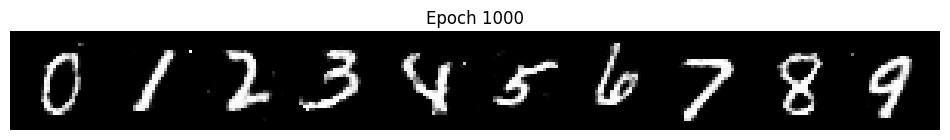

In [13]:
for epoch in range(epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        real_imgs = imgs.to(device)
        labels = labels.to(device)
        batch_size_curr = real_imgs.size(0)

        valid = torch.ones(batch_size_curr, 1, device=device)
        fake = torch.zeros(batch_size_curr, 1, device=device)

        # -----------------
        # Train Discriminator
        # -----------------
        optimizer_D.zero_grad()

        real_loss = adversarial_loss(
            discriminator(real_imgs, labels), valid
        )

        z = torch.randn(batch_size_curr, latent_dim, device=device)
        gen_labels = torch.randint(0, num_classes, (batch_size_curr,), device=device)
        gen_imgs = generator(z, gen_labels)

        fake_loss = adversarial_loss(
            discriminator(gen_imgs.detach(), gen_labels), fake
        )

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        g_loss = adversarial_loss(
            discriminator(gen_imgs, gen_labels), valid
        )
        g_loss.backward()
        optimizer_G.step()

        if i % 400 == 0:
            print(
                f"Epoch [{epoch+1}/{epochs}] "
                f"Batch [{i}/{len(dataloader)}] "
                f"D Loss: {d_loss.item():.4f} "
                f"G Loss: {g_loss.item():.4f}"
            )

    if (epoch + 1) in [1, 50, 100, 500, 1000]:
        save_generated_images(epoch + 1)
